In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = 'all'
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"

  # IPython 7.14 deprecated set_matplotlib_formats from IPython
  try:
    from matplotlib_inline.backend_inline import set_matplotlib_formats
  except ImportError:
    # Fall back to deprecated location for older IPython versions
    from IPython.display import set_matplotlib_formats
    
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L1VzZXJzL3NhbWZvcmVtYW4vcHJvamVjdHMvc2Fmb3JlbTIvcGVyc29uYWxfc2l0ZV9DTEVBTi9wcm9qZWN0cy9ocGMtYm9vdGNhbXAtMjAyNS8wMS1uZXVyYWwtbmV0d29ya3MvMS1tbmlzdA=='
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

{"/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/importlib/_bootstrap.py": 1738868689.7343743, "/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/importlib/_bootstrap_external.py": 1738868689.7405775, "/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/zipimport.py": 1738868687.674339, "/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/codecs.py": 1738868686.9707906, "/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/encodings/aliases.py": 1738868688.3587308, "/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/encodings/__init__.py": 1738868688.3530793, "/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/encodings/utf_8.py": 1738868689.0400195, "/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/abc.py": 1738868686.884046, "/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/io.py": 1738868687.170621, "/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/stat.py": 1738868687.4856465, "/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/_collections_abc.py": 173

In [2]:
%matplotlib inline

import torch
import torchvision
from torch import nn

import numpy 
import matplotlib.pyplot as plt
import time

In [3]:
training_data = torchvision.datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor()
)

test_data = torchvision.datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=torchvision.transforms.ToTensor()
)

In [4]:
train_size = int(0.8 * len(training_data))  # 80% for training
val_size = len(training_data) - train_size  # Remaining 20% for validation
training_data, validation_data = torch.utils.data.random_split(
    training_data,
    [train_size, val_size],
    generator=torch.Generator().manual_seed(55)
)

In [5]:
print('MNIST data loaded: train:',len(training_data),' examples, validation: ', len(validation_data), 'examples, test:',len(test_data), 'examples')
print('Input shape', training_data[0][0].shape)

MNIST data loaded: train: 48000  examples, validation:  12000 examples, test: 10000 examples
Input shape torch.Size([1, 28, 28])


<Figure size 960x96 with 0 Axes>

<Axes: >

(np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0))

Text(0.5, 1.0, 'Class: 1')

<Axes: >

(np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0))

Text(0.5, 1.0, 'Class: 0')

<Axes: >

(np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0))

Text(0.5, 1.0, 'Class: 2')

<Axes: >

(np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0))

Text(0.5, 1.0, 'Class: 0')

<Axes: >

(np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0))

Text(0.5, 1.0, 'Class: 9')

<Axes: >

(np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0))

Text(0.5, 1.0, 'Class: 7')

<Axes: >

(np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0))

Text(0.5, 1.0, 'Class: 7')

<Axes: >

(np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0))

Text(0.5, 1.0, 'Class: 1')

<Axes: >

(np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0))

Text(0.5, 1.0, 'Class: 0')

<Axes: >

(np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0))

Text(0.5, 1.0, 'Class: 8')

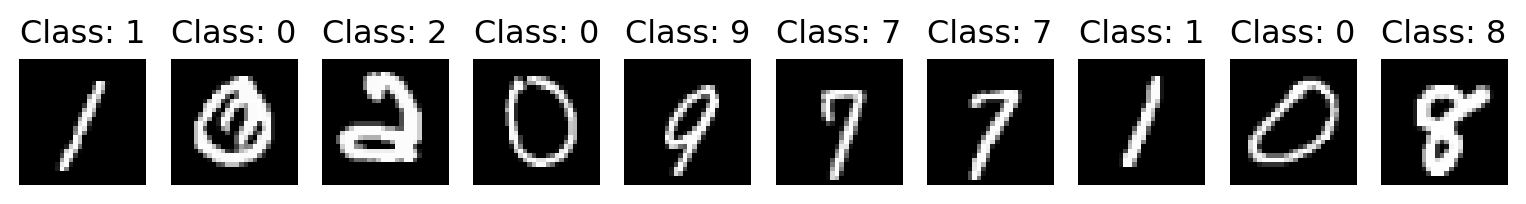

In [6]:
pltsize=1
plt.figure(figsize=(10*pltsize, pltsize))

for i in range(10):
    plt.subplot(1,10,i+1)
    plt.axis('off')
    plt.imshow(numpy.reshape(training_data[i][0], (28, 28)), cmap="gray")
    plt.title('Class: '+str(training_data[i][1]))

In [7]:
class LinearClassifier(nn.Module):

    def __init__(self):
        super().__init__()
        
        # First, we need to convert the input image to a vector by using 
        # nn.Flatten(). For MNIST, it means the second dimension 28*28 becomes 784.
        self.flatten = nn.Flatten()
        
        # Here, we add a fully connected ("dense") layer that has 28 x 28 = 784 input nodes 
        #(one for each pixel in the input image) and 10 output nodes (for probabilities of each class).
        self.layer_1 = nn.Linear(28*28, 10)
        
    def forward(self, x):

        x = self.flatten(x)
        x = self.layer_1(x)

        return x

In [8]:
linear_model = LinearClassifier()
print(linear_model)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(linear_model.parameters(), lr=0.05)

LinearClassifier(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (layer_1): Linear(in_features=784, out_features=10, bias=True)
)


In [9]:
batch_size = 128

# The dataloader makes our dataset iterable 
train_dataloader = torch.utils.data.DataLoader(training_data, batch_size=batch_size)
val_dataloader = torch.utils.data.DataLoader(validation_data, batch_size=batch_size)

In [10]:
def train_one_epoch(dataloader, model, loss_fn, optimizer):
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        # forward pass
        pred = model(X)
        loss = loss_fn(pred, y)
        
        # backward pass calculates gradients
        loss.backward()
        
        # take one step with these gradients
        optimizer.step()
        
        # resets the gradients 
        optimizer.zero_grad()

In [11]:
def evaluate(dataloader, model, loss_fn):
    # Set the model to evaluation mode - some NN pieces behave differently during training
    # Unnecessary in this situation but added for best practices
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    loss, correct = 0, 0

    # We can save computation and memory by not calculating gradients here - we aren't optimizing 
    with torch.no_grad():
        # loop over all of the batches
        for X, y in dataloader:
            pred = model(X)
            loss += loss_fn(pred, y).item()
            # how many are correct in this batch? Tracking for accuracy 
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    loss /= num_batches
    correct /= size
    
    accuracy = 100*correct
    return accuracy, loss

In [12]:
%%time

epochs = 5
train_acc_all = []
val_acc_all = []
for j in range(epochs):
    train_one_epoch(train_dataloader, linear_model, loss_fn, optimizer)
    
    # checking on the training loss and accuracy once per epoch
    acc, loss = evaluate(train_dataloader, linear_model, loss_fn)
    train_acc_all.append(acc)
    print(f"Epoch {j}: training loss: {loss}, accuracy: {acc}")
    
    # checking on the validation loss and accuracy once per epoch
    val_acc, val_loss = evaluate(val_dataloader, linear_model, loss_fn)
    val_acc_all.append(val_acc)
    print(f"Epoch {j}: val. loss: {val_loss}, val. accuracy: {val_acc}")

Epoch 0: training loss: 0.5024161070982616, accuracy: 87.62083333333334


Epoch 0: val. loss: 0.49455674246270603, val. accuracy: 87.65833333333333


Epoch 1: training loss: 0.4219221920967102, accuracy: 88.99791666666667


Epoch 1: val. loss: 0.41245168479199107, val. accuracy: 88.94999999999999


Epoch 2: training loss: 0.3878699736992518, accuracy: 89.69166666666666


Epoch 2: val. loss: 0.37782234254669633, val. accuracy: 89.55


Epoch 3: training loss: 0.36784369417031604, accuracy: 90.12708333333333


Epoch 3: val. loss: 0.35761993188173213, val. accuracy: 89.97500000000001


Epoch 4: training loss: 0.3542205874125163, accuracy: 90.43541666666667


Epoch 4: val. loss: 0.34401256638638517, val. accuracy: 90.275
CPU times: user 28.2 s, sys: 26.6 s, total: 54.7 s
Wall time: 11.4 s


<Figure size 960x960 with 0 Axes>

Text(0.5, 0, 'Epoch #')

Text(0, 0.5, 'Loss')

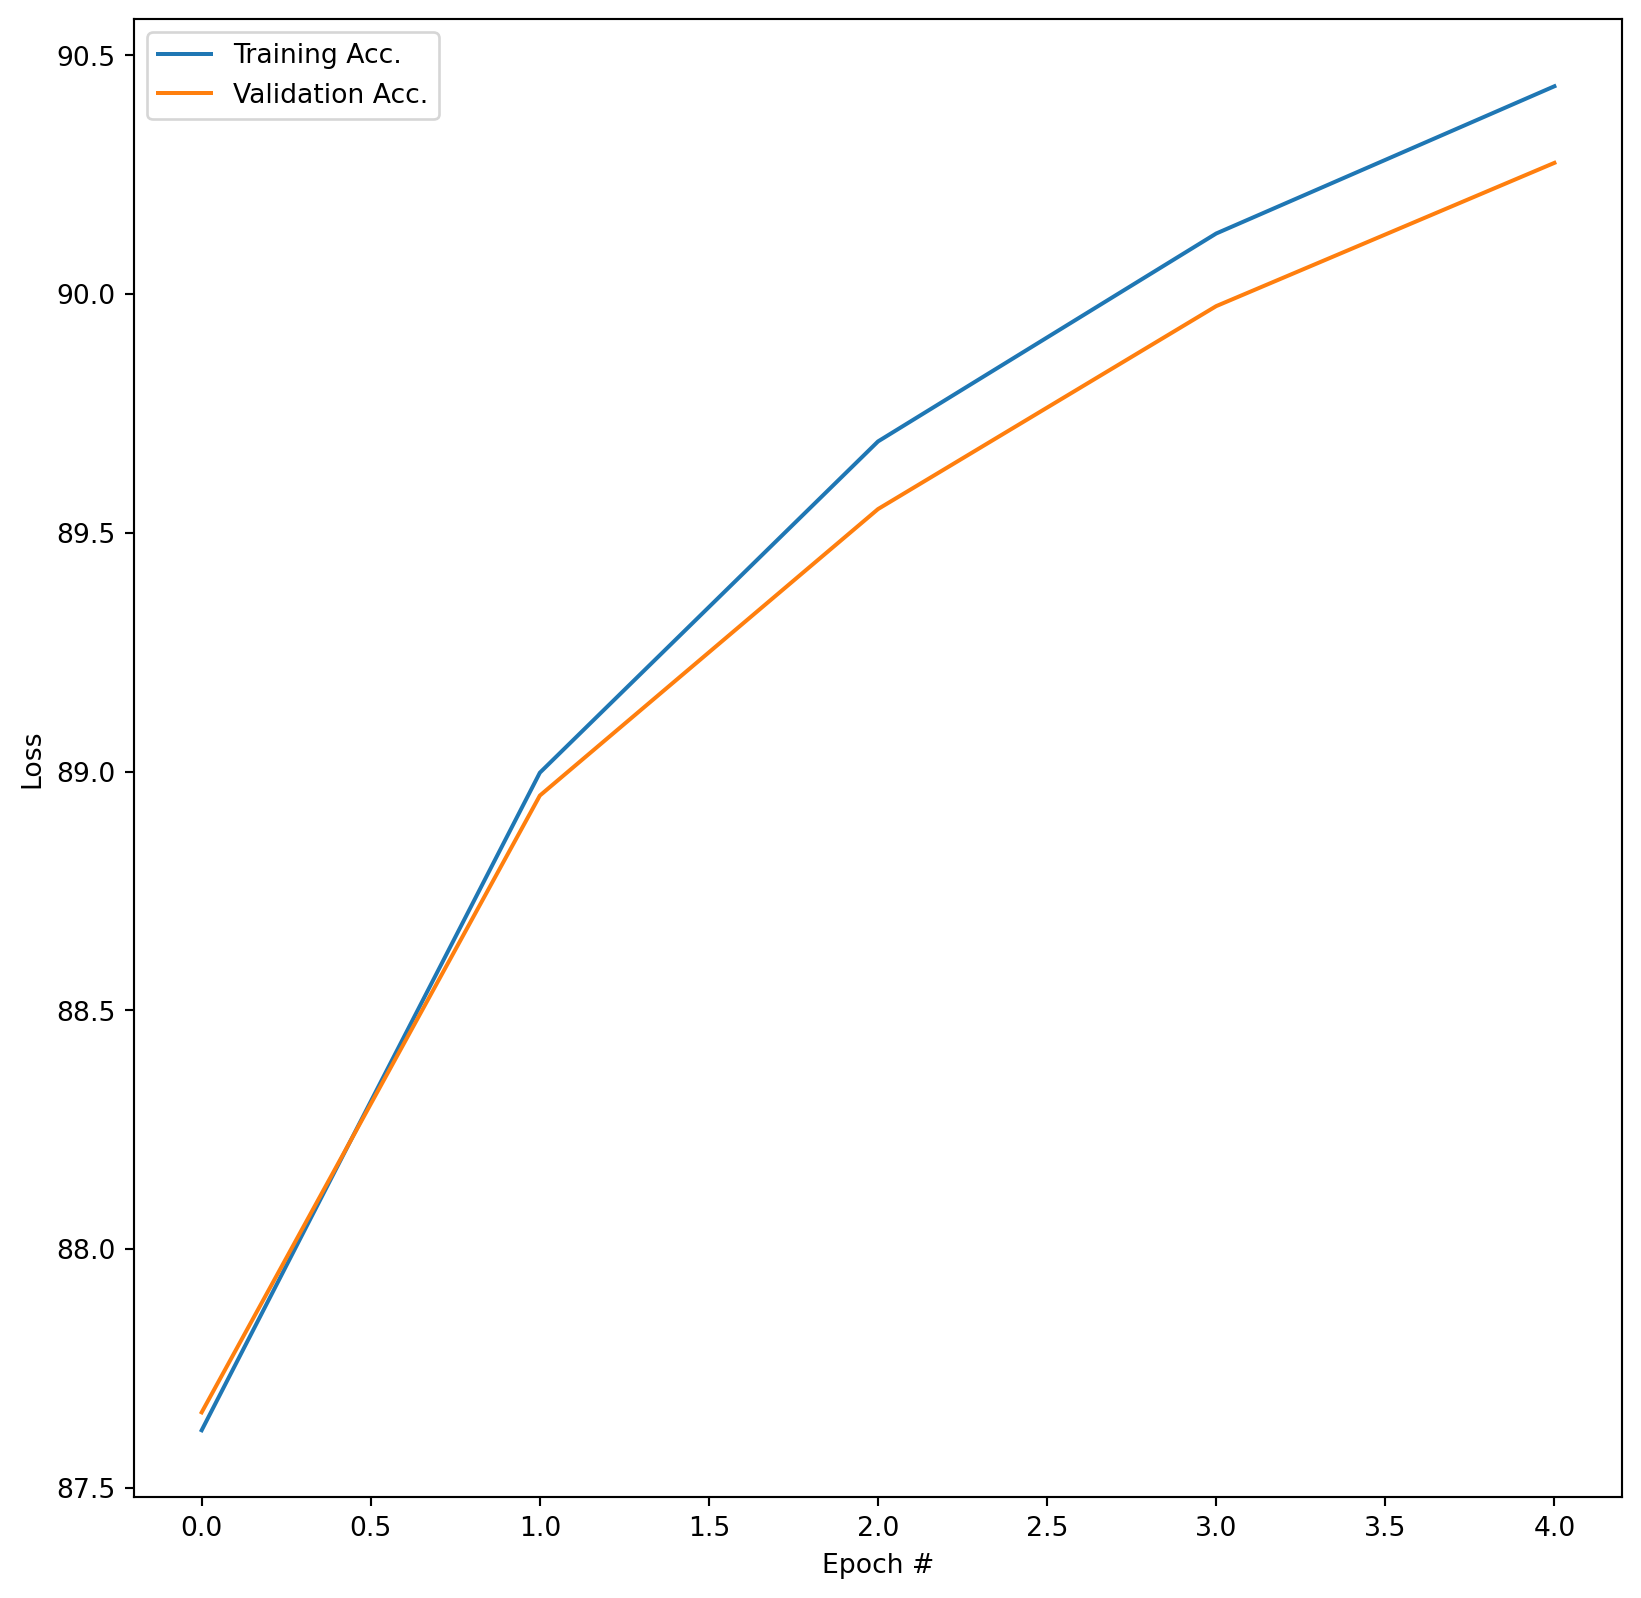

In [13]:
pltsize=1
plt.figure(figsize=(10*pltsize, 10 * pltsize))
plt.plot(range(epochs), train_acc_all,label = 'Training Acc.' )
plt.plot(range(epochs), val_acc_all, label = 'Validation Acc.' )
plt.xlabel('Epoch #')
plt.ylabel('Loss')
plt.legend()

<Figure size 960x96 with 0 Axes>

LinearClassifier(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (layer_1): Linear(in_features=784, out_features=10, bias=True)
)

<Axes: >

(np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0))

Text(0.5, 1.0, '1')

<Axes: >

(np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0))

Text(0.5, 1.0, '0')

<Axes: >

(np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0))

Text(0.5, 1.0, '2')

<Axes: >

(np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0))

Text(0.5, 1.0, '0')

<Axes: >

(np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0))

Text(0.5, 1.0, '9')

<Axes: >

(np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0))

Text(0.5, 1.0, '7')

<Axes: >

(np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0))

Text(0.5, 1.0, '7')

<Axes: >

(np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0))

Text(0.5, 1.0, '1')

<Axes: >

(np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0))

Text(0.5, 1.0, '0')

<Axes: >

(np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0))

Text(0.5, 1.0, '8')

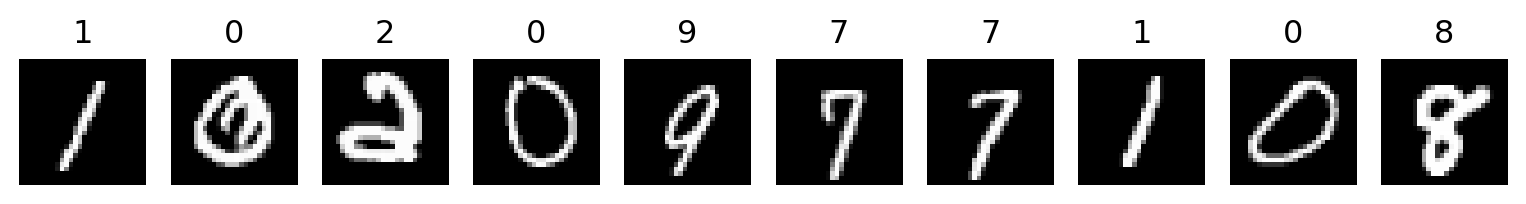

In [14]:
# Visualize how the model is doing on the first 10 examples
pltsize=1
plt.figure(figsize=(10*pltsize, pltsize))
linear_model.eval()
batch = next(iter(train_dataloader))
predictions = linear_model(batch[0])

for i in range(10):
    plt.subplot(1,10,i+1)
    plt.axis('off')
    plt.imshow(batch[0][i,0,:,:], cmap="gray")
    plt.title('%d' % predictions[i,:].argmax())

In [15]:
#For HW: cell to change batch size
#create dataloader for test data
# The dataloader makes our dataset iterable

batch_size_test = 256 
test_dataloader = torch.utils.data.DataLoader(test_data, batch_size=batch_size_test)

In [16]:
acc_test, loss_test = evaluate(test_dataloader, linear_model, loss_fn)
print("Test loss: %.4f, test accuracy: %.2f%%" % (loss_test, acc_test))

Test loss: 0.3325, test accuracy: 90.76%


In [17]:
def show_failures(model, dataloader, maxtoshow=10):
    model.eval()
    batch = next(iter(dataloader))
    predictions = model(batch[0])
    
    rounded = predictions.argmax(1)
    errors = rounded!=batch[1]
    print('Showing max', maxtoshow, 'first failures. '
          'The predicted class is shown first and the correct class in parentheses.')
    ii = 0
    plt.figure(figsize=(maxtoshow, 1))
    for i in range(batch[0].shape[0]):
        if ii>=maxtoshow:
            break
        if errors[i]:
            plt.subplot(1, maxtoshow, ii+1)
            plt.axis('off')
            plt.imshow(batch[0][i,0,:,:], cmap="gray")
            plt.title("%d (%d)" % (rounded[i], batch[1][i]))
            ii = ii + 1

Showing max 10 first failures. The predicted class is shown first and the correct class in parentheses.


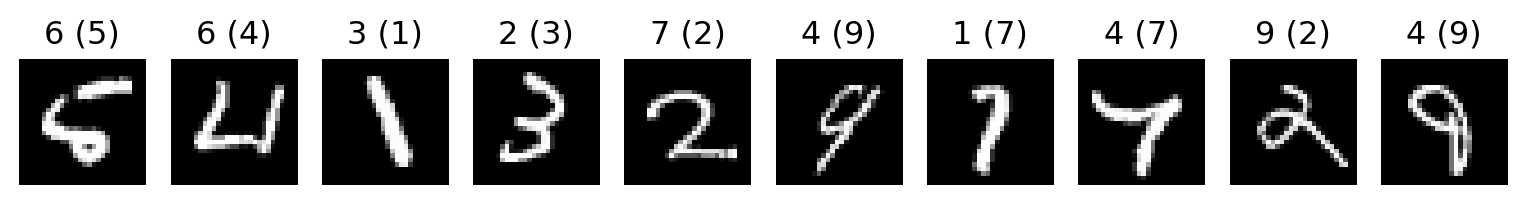

In [18]:
show_failures(linear_model, test_dataloader)

In [19]:
#For HW: cell to change activation
class NonlinearClassifier(nn.Module):

    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.layers_stack = nn.Sequential(
            nn.Linear(28*28, 50),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(50, 50),
            nn.ReLU(),
           # nn.Dropout(0.2),
            nn.Linear(50, 50),
            nn.ReLU(),
           # nn.Dropout(0.2),
            nn.Linear(50, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        x = self.layers_stack(x)

        return x

In [20]:
#### For HW: cell to change learning rate
nonlinear_model = NonlinearClassifier()
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(nonlinear_model.parameters(), lr=0.05)

In [21]:
%%time

epochs = 5
train_acc_all = []
val_acc_all = []
for j in range(epochs):
    train_one_epoch(train_dataloader, nonlinear_model, loss_fn, optimizer)

    # checking on the training loss and accuracy once per epoch
    acc, loss = evaluate(train_dataloader, nonlinear_model, loss_fn)
    train_acc_all.append(acc)
    print(f"Epoch {j}: training loss: {loss}, accuracy: {acc}")

    # checking on the validation loss and accuracy once per epoch
    val_acc, val_loss = evaluate(val_dataloader, nonlinear_model, loss_fn)
    val_acc_all.append(val_acc)
    print(f"Epoch {j}: val. loss: {val_loss}, val. accuracy: {val_acc}")

Epoch 0: training loss: 0.7385847474733989, accuracy: 78.65416666666667


Epoch 0: val. loss: 0.7337854992836079, val. accuracy: 78.11666666666667


Epoch 1: training loss: 0.39526840726534523, accuracy: 89.02708333333334


Epoch 1: val. loss: 0.38625017379192594, val. accuracy: 88.8


Epoch 2: training loss: 0.3067314211130142, accuracy: 91.29166666666667


Epoch 2: val. loss: 0.30008558580215944, val. accuracy: 91.08333333333334


Epoch 3: training loss: 0.25363053729136786, accuracy: 92.80208333333333


Epoch 3: val. loss: 0.24976025268118432, val. accuracy: 92.65833333333333


Epoch 4: training loss: 0.21330132641394933, accuracy: 93.87291666666667


Epoch 4: val. loss: 0.21286878298888814, val. accuracy: 93.61666666666667
CPU times: user 30 s, sys: 29.6 s, total: 59.6 s
Wall time: 11.9 s


<Figure size 960x960 with 0 Axes>

Text(0.5, 0, 'Epoch #')

Text(0, 0.5, 'Loss')

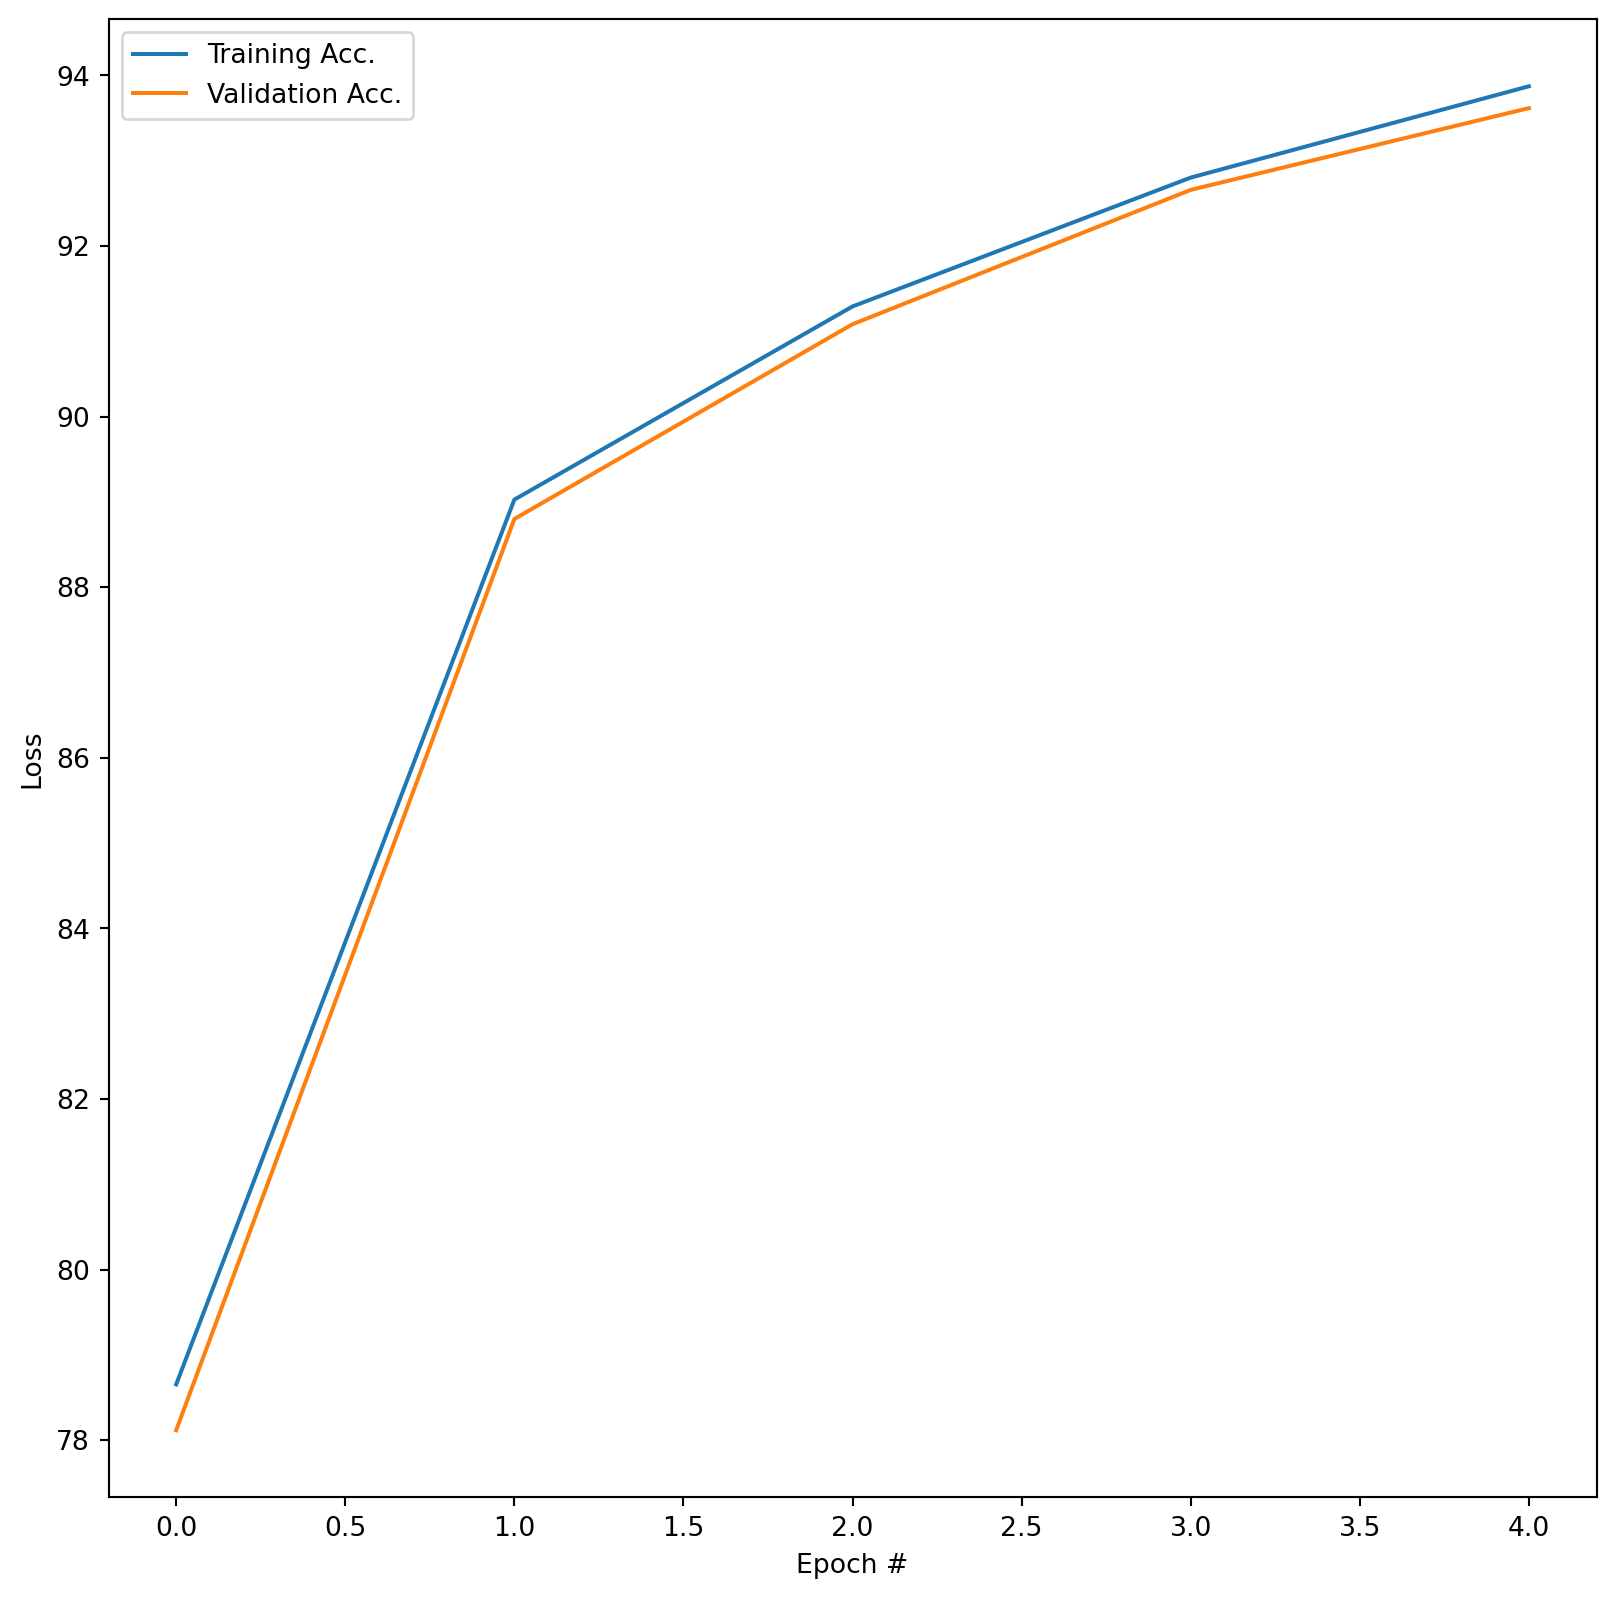

In [22]:
pltsize=1
plt.figure(figsize=(10*pltsize, 10 * pltsize))
plt.plot(range(epochs), train_acc_all,label = 'Training Acc.' )
plt.plot(range(epochs), val_acc_all, label = 'Validation Acc.' )
plt.xlabel('Epoch #')
plt.ylabel('Loss')
plt.legend()

Showing max 10 first failures. The predicted class is shown first and the correct class in parentheses.


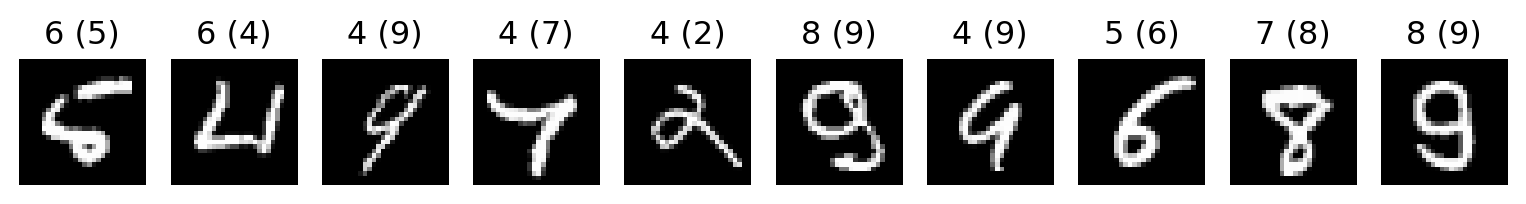

In [23]:
show_failures(nonlinear_model, test_dataloader)

In [24]:
#####################To modify the batch size##########################
batch_size = 32 # 64, 128, 256, 512

# The dataloader makes our dataset iterable 
train_dataloader = torch.utils.data.DataLoader(training_data, batch_size=batch_size)
val_dataloader = torch.utils.data.DataLoader(validation_data, batch_size=batch_size)
##############################################################################


##########################To change the learning rate##########################
optimizer = torch.optim.SGD(nonlinear_model.parameters(), lr=0.01) #modify the value of lr
##############################################################################


##########################To change activation##########################
###### Go to https://pytorch.org/docs/main/nn.html#non-linear-activations-weighted-sum-nonlinearity for more activations ######
class NonlinearClassifier(nn.Module):

    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.layers_stack = nn.Sequential(
            nn.Linear(28*28, 50),
            nn.Sigmoid(), #nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(50, 50),
            nn.Tanh(), #nn.ReLU(),
           # nn.Dropout(0.2),
            nn.Linear(50, 50),
            nn.ReLU(),
           # nn.Dropout(0.2),
            nn.Linear(50, 10)
        )
        
    def forward(self, x):
        x = self.flatten(x)
        x = self.layers_stack(x)

        return x
##############################################################################

In [25]:
nonlinear_model = NonlinearClassifier()
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(nonlinear_model.parameters(), lr=0.1)

# Step learning rate scheduler: reduce by a factor of 0.1 every 2 epochs (only for illustrative purposes)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.1)

In [26]:
%%time

epochs = 6
train_acc_all = []
val_acc_all = []
for j in range(epochs):
    train_one_epoch(train_dataloader, nonlinear_model, loss_fn, optimizer)
    #step the scheduler
    scheduler.step()

    # Print the current learning rate
    current_lr = optimizer.param_groups[0]['lr']
    print(f"Epoch {j+1}/{epochs}, Learning Rate: {current_lr}")
        
    # checking on the training loss and accuracy once per epoch
    acc, loss = evaluate(train_dataloader, nonlinear_model, loss_fn)
    train_acc_all.append(acc)
    print(f"Epoch {j}: training loss: {loss}, accuracy: {acc}")
    
    # checking on the validation loss and accuracy once per epoch
    val_acc, val_loss = evaluate(val_dataloader, nonlinear_model, loss_fn)
    val_acc_all.append(val_acc)
    print(f"Epoch {j}: val. loss: {val_loss}, val. accuracy: {val_acc}")

Epoch 1/6, Learning Rate: 0.1


Epoch 0: training loss: 0.38221720697979134, accuracy: 89.02083333333334


Epoch 0: val. loss: 0.3703822658260663, val. accuracy: 88.94999999999999


Epoch 2/6, Learning Rate: 0.010000000000000002


Epoch 1: training loss: 0.2606301003048817, accuracy: 92.23125


Epoch 1: val. loss: 0.2498151312470436, val. accuracy: 92.425


Epoch 3/6, Learning Rate: 0.010000000000000002


Epoch 2: training loss: 0.23383092568318048, accuracy: 93.05624999999999


Epoch 2: val. loss: 0.22530902962883315, val. accuracy: 93.175


Epoch 4/6, Learning Rate: 0.0010000000000000002


Epoch 3: training loss: 0.22609239247565469, accuracy: 93.24375


Epoch 3: val. loss: 0.21847300127645333, val. accuracy: 93.35


Epoch 5/6, Learning Rate: 0.0010000000000000002


Epoch 4: training loss: 0.2249794482005139, accuracy: 93.24583333333332


Epoch 4: val. loss: 0.21745173327624798, val. accuracy: 93.43333333333334


Epoch 6/6, Learning Rate: 0.00010000000000000003


Epoch 5: training loss: 0.22417646284401416, accuracy: 93.28333333333333


Epoch 5: val. loss: 0.21657616588970025, val. accuracy: 93.43333333333334
CPU times: user 46.9 s, sys: 46.2 s, total: 1min 33s
Wall time: 19 s
